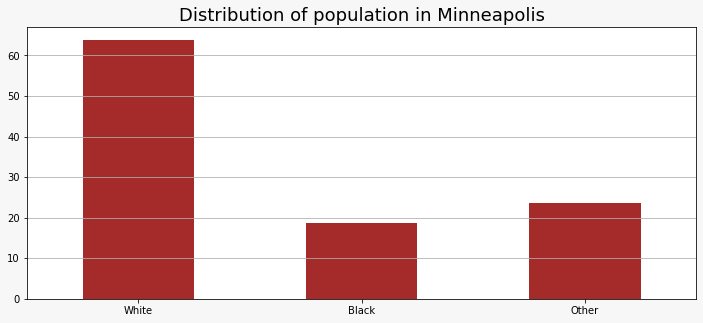

In [79]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(12, 5),facecolor='#f7f7f7')

wikipedia_2010_census = {'White': [63.8], 
        'Black': [18.6], 
        'Other': [23.7]}
wikipedia_2010_census_df = pd.DataFrame(wikipedia_2010_census).transpose()

wikipedia_2010_census_df.plot(kind='bar', ax=ax,color='brown')
plt.xticks(rotation=0)
ax.legend().set_visible(False)
ax.set_title('Distribution of population in Minneapolis', fontsize=18)
ax.grid(axis='y')

plt.show()

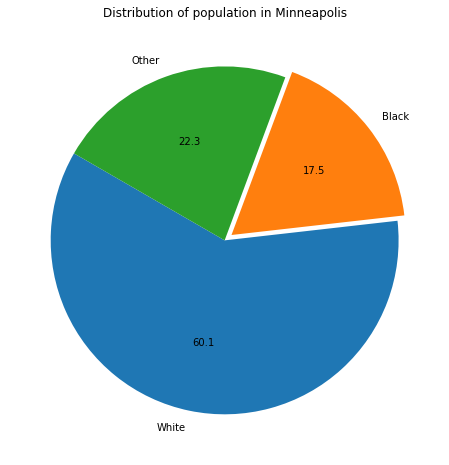

In [80]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
census = {'White': 63.8, 
        'Black': 18.6, 
        'Other': 23.7}
keys=list(census.keys())
values=list(census.values())
# for i in range(3):
#     plt.bar(keys[i],values[i])
# plt.xlabel("race")
# plt.ylabel("percentage")
# plt.savefig("531_1.png")
# plt.show()
plt.figure(figsize=(8,8))
plt.pie(values,explode=[0,.05,0],labels=keys,startangle=150,autopct='%1.1f')
plt.title("Distribution of population in Minneapolis")

plt.savefig("531_1",dpi=600,bbox_inches='tight')


In [81]:

data=pd.read_csv("police_stop_data.csv")
data["responseDate"]=data["responseDate"].apply(lambda x:x.split(" ")[0][:7])
data["race"]=data["race"].fillna("Unknown")
data["reason"]=data["reason"].fillna("Unknown")
# convert date to year+month

/Users/jiangdongzhe/PycharmProjects/untitled1/untitled2/untitled folder/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


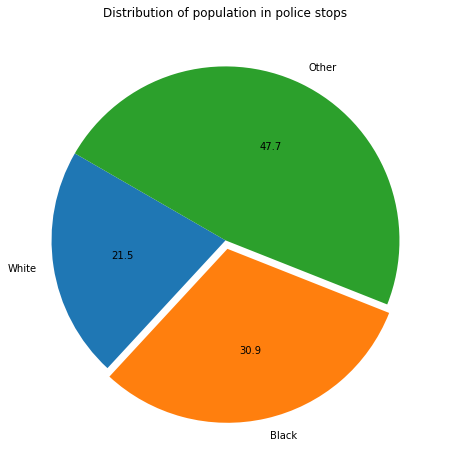

In [82]:
stop_distribution={}
total_number=data["race"].count()
black_number=data[data["race"]=="Black"]["race"].count()
white_number=data[data["race"]=="White"]["race"].count()
other_number=total_number-black_number-white_number
stop_distribution["White"]=white_number/total_number*100

stop_distribution["Black"]=black_number/total_number*100
stop_distribution["Other"]=other_number/total_number*100
keys=list(stop_distribution.keys())
values=list(stop_distribution.values())
# for i in range(3):
#     plt.bar(keys[i],values[i])
# plt.xlabel("race")
# plt.ylabel("percentage")
# plt.savefig("531_1.png")
# plt.show()
plt.figure(figsize=(8,8))
plt.pie(values,explode=[0,.05,0],labels=keys,startangle=150,autopct='%1.1f')
plt.title("Distribution of population in police stops")

plt.savefig("531_2",dpi=600,bbox_inches='tight')


['Black', 'Unknown', 'East African', 'White', 'Latino', 'Asian', 'Native American', 'Other']
[('Unknown', 54552), ('Black', 50029), ('White', 34789), ('East African', 7294), ('Latino', 5676), ('Native American', 4187), ('Other', 3622), ('Asian', 1939)]


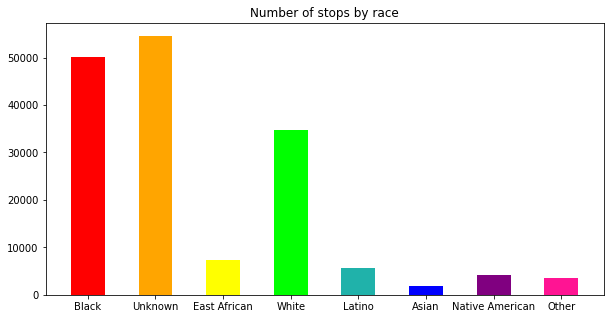

In [83]:
race_stop_map={}
#list all races
print(list(data["race"].drop_duplicates()))
# count for each race
for i in list(data["race"].drop_duplicates()):
    race_stop_map[i]=data[data["race"]==i]["race"].count()
race_stop_list=sorted(race_stop_map.items(), key=lambda d:d[1], reverse=True)
# draw hist diagram
print(race_stop_list)
plt.figure(figsize=(10,5))
plt.bar(list(race_stop_map.keys()),list(race_stop_map.values()),width=0.5,color=['red','orange','yellow','lime','lightseagreen','blue',
                                                                                 'purple','deeppink'])
plt.title("Number of stops by race")
plt.savefig("531_3",dpi=600,bbox_inches='tight')
plt.show()


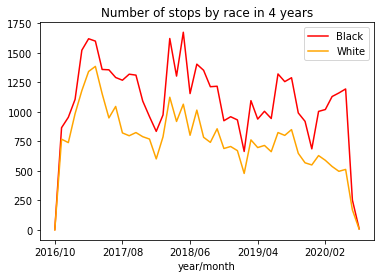

In [84]:
import matplotlib.ticker as ticker

#list of year+month
date_x=list(data["responseDate"].drop_duplicates())
# date_x=[""]*len(date_list)
# date_x[0]=date_list[0]
# date_x[12]=date_list[12]
black_date=[]
white_date=[]
#other_date=[]
# count the number of stops for each race in every month in the history
for i in date_x:
    thisdate=data[data["responseDate"]==i]
    black_date.append(thisdate[thisdate["race"]=="Black"]["race"].count())
    white_date.append(thisdate[thisdate["race"]=="White"]["race"].count())
    #other_date.append(thisdate["race"].count()-thisdate[thisdate["race"]=="Black"]["race"].count()-thisdate[thisdate["race"]=="White"]["race"].count())
plt.plot(date_x,black_date,'r',label='Black')
plt.plot(date_x,white_date,'orange',label='White')
#plt.plot(date_x,other_date,'b',label='Other')
plt.legend()
plt.title("Number of stops by race in 4 years")
plt.xlabel("year/month")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.savefig("531_4",dpi=600,bbox_inches='tight')

plt.show()
    

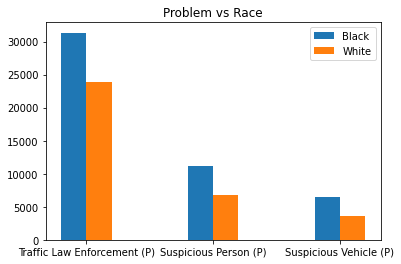

In [85]:
black=[]
white=[]
other=[]
# traffic_black=[]
# traffic_white=[]
# traffic_other=[]
# person_black=[]
# person_white=[]
# person_other=[]
# vehicle_black=[]
# vehicle_white=[]
# vehicle_other=[]
problems=['Traffic Law Enforcement (P)','Suspicious Person (P)','Suspicious Vehicle (P)']
for p in problems:
    thisproblem=data[data["problem"]==p]
    total_number=thisproblem["race"].count()
    # if 'Traffic'in p:
    #     traffic_black.append(thisproblem[thisproblem["race"]=='Black']['race'].count())
    #     traffic_white.append(thisproblem[thisproblem['race']=='White']['race'].count())
    #     traffic_other.append(total_number-thisproblem[thisproblem["race"]=='Black']['race'].count()-thisproblem[thisproblem["race"]=='White']['race'].count())
    #  if 'Person'in p:
    #     person_black.append(thisproblem[thisproblem["race"]=='Black']['race'].count())
    #     person_white.append(thisproblem[thisproblem['race']=='White']['race'].count())
    #     person_other.append(total_number-thisproblem[thisproblem["race"]=='Black']['race'].count()-thisproblem[thisproblem["race"]=='White']['race'].count())
    # if 'Vehicle'in p:
    black.append(thisproblem[thisproblem["race"]=='Black']['race'].count())
    white.append(thisproblem[thisproblem['race']=='White']['race'].count())
    #other.append(total_number-thisproblem[thisproblem["race"]=='Black']['race'].count()-thisproblem[thisproblem["race"]=='White']['race'].count())
    
fig,ax=plt.subplots()
#plt.figure(figsize=(10,5))
width=0.2
x=np.array([0,1,2])
rec1=ax.bar(x-width/2,black,width,label='Black')
rec2=ax.bar(x+width/2,white,width,label='White')
#rec3=ax.bar(x+width,other,width,label='Other')
ax.set_title("Problem vs Race")
ax.set_xticks(x)
ax.set_xticklabels(problems)
ax.legend()
plt.savefig("531_5",dpi=600,bbox_inches="tight")
plt.show()


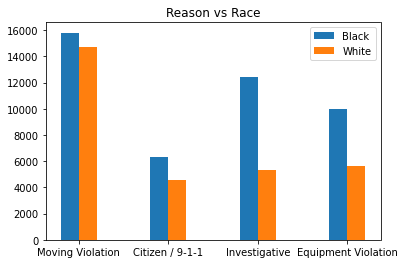

In [77]:
black=[]
white=[]
other=[]
# traffic_black=[]
# traffic_white=[]
# traffic_other=[]
# person_black=[]
# person_white=[]
# person_other=[]
# vehicle_black=[]
# vehicle_white=[]
# vehicle_other=[]
reasons=['Moving Violation','Citizen / 9-1-1','Investigative','Equipment Violation']
for p in reasons:
    thisreason=data[data["reason"]==p]
    total_number=thisreason["race"].count()
    # if 'Traffic'in p:
    #     traffic_black.append(thisproblem[thisproblem["race"]=='Black']['race'].count())
    #     traffic_white.append(thisproblem[thisproblem['race']=='White']['race'].count())
    #     traffic_other.append(total_number-thisproblem[thisproblem["race"]=='Black']['race'].count()-thisproblem[thisproblem["race"]=='White']['race'].count())
    #  if 'Person'in p:
    #     person_black.append(thisproblem[thisproblem["race"]=='Black']['race'].count())
    #     person_white.append(thisproblem[thisproblem['race']=='White']['race'].count())
    #     person_other.append(total_number-thisproblem[thisproblem["race"]=='Black']['race'].count()-thisproblem[thisproblem["race"]=='White']['race'].count())
    # if 'Vehicle'in p:
    black.append(thisreason[thisreason["race"]=='Black']['race'].count())
    white.append(thisreason[thisreason['race']=='White']['race'].count())
    #other.append(total_number-thisproblem[thisproblem["race"]=='Black']['race'].count()-thisproblem[thisproblem["race"]=='White']['race'].count())
    
fig,ax=plt.subplots()
#plt.figure(figsize=(10,5))
width=0.2
x=np.array([0,1,2,3])
rec1=ax.bar(x-width/2,black,width,label='Black')
rec2=ax.bar(x+width/2,white,width,label='White')
#rec3=ax.bar(x+width,other,width,label='Other')
ax.set_title("Reason vs Race")
ax.set_xticks(x)
ax.set_xticklabels(reasons)
ax.legend()
plt.savefig("531_6.png",dpi=600,bbox_inches="tight")
plt.show()